# 1. 데이터 불러오기

In [2]:
import os
os.chdir('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data')

In [3]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# 2. TRAIN TEST 안나눈 ANN-1

In [88]:
import tensorflow as tf
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [89]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

#가벼운 모델 생성
model = Sequential()
model.add(Dense(32, input_shape =(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 600, 32)           224       
_________________________________________________________________
dense_45 (Dense)             (None, 600, 128)          4224      
_________________________________________________________________
flatten_3 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 61)                4684861   
Total params: 4,689,309
Trainable params: 4,689,309
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 5s 210ms/step - loss: 519.7307 - accuracy: 0.1649 - val_loss: 155.3086 - val_accuracy: 0.2848
Epoch 2/30
20/20 [==============================] - 4s 192ms/step - loss: 91.2555 - accuracy: 0.3473 - val_loss: 55.9351 - val_accuracy: 0.1584
Epoch 3/30
20/20 [==============================] - 4s 203ms/step - loss: 17.9763 - accuracy: 0.4839 - val_loss: 30.6265 - val_accuracy: 0.1120
Epoch 4/30
20/20 [==============================] - 4s 202ms/step - loss: 7.1525 - accuracy: 0.5686 - val_loss: 16.9364 - val_accuracy: 0.5184
Epoch 5/30
20/20 [==============================] - 4s 207ms/step - loss: 4.8351 - accuracy: 0.5938 - val_loss: 10.8585 - val_accuracy: 0.5440
Epoch 6/30
20/20 [==============================] - 4s 199ms/step - loss: 2.8523 - accuracy: 0.6626 - val_loss: 15.3629 - val_accuracy: 0.1712
Epoch 7/30
20/20 [==============================] - 4s 191ms/step - loss: 2.7784 - accuracy: 0.6951 - val_loss: 16.2299 - val_accuracy: 0

In [93]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [94]:
pred=model.predict(test_X)

In [95]:
submission.iloc[:,1:]=prediction

In [96]:
submission.to_csv('ann_1.csv', index=False)

### 3번보다 logloss가 더 안좋음

# 3. TRAIN, TEST 나눈 ANN-2

In [5]:
import tensorflow as tf
X_train = train[(train['id']>= 0) & (train['id']<=2499)]
X_test = train[train['id'] >= 2500]
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

In [6]:
from tensorflow.keras.utils import to_categorical
y =  train_labels['label']

In [7]:
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

In [57]:
y_train.value_counts()

26    1207
8       78
28      46
60      39
18      35
      ... 
52      11
12       9
13       8
53       8
0        7
Name: label, Length: 61, dtype: int64

In [8]:
slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

In [59]:
y_train.value_counts()

26    1207
8       78
28      46
60      39
18      35
      ... 
52      11
12       9
13       8
53       8
0        7
Name: label, Length: 61, dtype: int64

In [9]:
y_train_encoding = tf.keras.utils.to_categorical(y_train)
y_test_encoding = tf.keras.utils.to_categorical(y_test)

In [11]:
print(X_train.shape)
print(y_train_encoding.shape)
print(X_test.shape)
print(y_test_encoding.shape)

(2500, 600, 6)
(2500, 61)
(625, 600, 6)
(625, 61)


In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

#가벼운 모델 생성
model = Sequential()
model.add(Dense(32, input_shape =(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 600, 32)           224       
_________________________________________________________________
dense_42 (Dense)             (None, 600, 128)          4224      
_________________________________________________________________
flatten_2 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 61)                4684861   
Total params: 4,689,309
Trainable params: 4,689,309
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 3s 198ms/step - loss: 1.9018 - accuracy: 0.8145 - val_loss: 21.9350 - val_accuracy: 0.2980
Epoch 2/30
16/16 [==============================] - 3s 222ms/step - loss: 1.6473 - accuracy: 0.8440 - val_loss: 11.7266 - val_accuracy: 0.5540
Epoch 3/30
16/16 [==============================] - 3s 200ms/step - loss: 2.3412 - accuracy: 0.8355 - val_loss: 14.7032 - val_accuracy: 0.5340
Epoch 4/30
16/16 [==============================] - 3s 199ms/step - loss: 3.6350 - accuracy: 0.8115 - val_loss: 17.2157 - val_accuracy: 0.3020
Epoch 5/30
16/16 [==============================] - 3s 199ms/step - loss: 0.5563 - accuracy: 0.9190 - val_loss: 13.3700 - val_accuracy: 0.5200
Epoch 6/30
16/16 [==============================] - 3s 201ms/step - loss: 0.5248 - accuracy: 0.9375 - val_loss: 23.6382 - val_accuracy: 0.5120
Epoch 7/30
16/16 [==============================] - 3s 198ms/step - loss: 1.8609 - accuracy: 0.8450 - val_loss: 17.7125 - val_accuracy: 0.5420

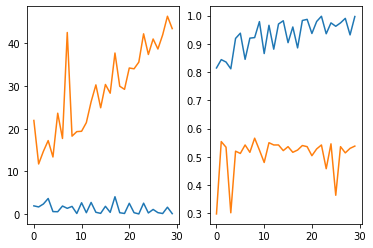

In [67]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [68]:
y_pred = model.predict(X_test)

In [70]:
y_pred[0].shape # 각 항목의 길이

(61,)

In [71]:
import numpy as np
np.sum(y_pred[0])

1.0

In [72]:
np.argmax(y_pred[0])

40

In [75]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4475020e-10, 0.0000000e+00, 0.0000000e+00, ..., 1.1684412e-18,
        5.6029339e-32, 1.6960847e-07],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.1936262e-35, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [78]:
y_test_encoding

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [77]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test_encoding)))

테스트 세트의 정확도: 0.64


In [82]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [83]:
prediction=model.predict(test_X)

In [84]:
prediction.shape

(782, 61)

In [85]:
submission.iloc[:,1:]=prediction

In [86]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,2.307985e-11,6.876293e-27,2.725003e-28,2.277052e-12,4.695529e-18,8.595889e-22,0.000000e+00,7.764758e-30,4.666689e-26,...,2.211495e-05,4.322779e-22,9.453852e-15,1.466340e-25,7.784372e-20,5.407317e-36,4.809331e-06,1.743600e-05,1.406010e-30,2.217718e-15
1,3126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.140302e-25,0.000000e+00,0.000000e+00,1.245234e-35,8.364057e-22,1.428937e-36,1.825730e-34,0.000000e+00,6.278619e-16,0.000000e+00
2,3127,6.054896e-29,1.443853e-14,0.000000e+00,4.269063e-38,4.108669e-37,5.353890e-23,4.829435e-19,4.956907e-30,1.025105e-12,...,1.198847e-22,0.000000e+00,1.298647e-24,4.084513e-28,2.877678e-26,5.105001e-29,1.756111e-35,1.672518e-36,8.994130e-24,0.000000e+00
3,3128,2.206286e-34,2.557948e-36,3.906128e-18,4.598045e-36,2.076792e-20,1.325442e-37,0.000000e+00,1.942060e-30,4.742436e-33,...,1.240766e-28,0.000000e+00,3.924147e-30,1.981822e-38,9.497164e-19,8.540852e-26,5.005519e-16,3.997669e-37,1.023634e-18,0.000000e+00
4,3129,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.754169e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.945565e-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
778,3903,0.000000e+00,1.367279e-33,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
779,3904,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.809565e-34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
780,3905,0.000000e+00,1.655682e-27,0.000000e+00,0.000000e+00,5.207890e-35,5.597661e-35,2.576311e-29,7.180730e-16,9.361516e-37,...,0.000000e+00,0.000000e+00,9.537996e-23,1.076862e-22,6.328257e-29,0.000000e+00,0.000000e+00,0.000000e+00,5.097853e-14,0.000000e+00


In [87]:
submission.to_csv('submission.csv', index=False)

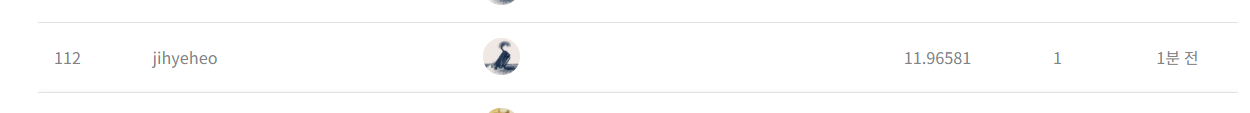

# 4. 나눈 ANN-3 (y_pred랑 정확도가 너무 낮음)

In [97]:
X_train = train[(train['id']>= 0) & (train['id']<=2499)]
X_test = train[train['id'] >= 2500]
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

from tensorflow.keras.utils import to_categorical
y =  train_labels['label']
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

y_train_encoding = tf.keras.utils.to_categorical(y_train)
y_test_encoding = tf.keras.utils.to_categorical(y_test)

In [98]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

#은닉층 개수 바꿔보기
model = Sequential()
model.add(Dense(16, input_shape =(600,6)))
model.add(Dense(30, activation='relu'))
model.add(Flatten())
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 3s 82ms/step - loss: 208.9808 - accuracy: 0.1759 - val_loss: 219.2012 - val_accuracy: 0.0100
Epoch 2/30
16/16 [==============================] - 1s 56ms/step - loss: 104.8896 - accuracy: 0.2663 - val_loss: 81.8801 - val_accuracy: 0.4640
Epoch 3/30
16/16 [==============================] - 1s 57ms/step - loss: 33.2033 - accuracy: 0.4438 - val_loss: 58.5635 - val_accuracy: 0.4780
Epoch 4/30
16/16 [==============================] - 1s 57ms/step - loss: 14.3142 - accuracy: 0.5928 - val_loss: 51.3598 - val_accuracy: 0.3840
Epoch 5/30
16/16 [==============================] - 1s 57ms/step - loss: 9.3945 - accuracy: 0.6318 - val_loss: 59.3161 - val_accuracy: 0.1220
Epoch 6/30
16/16 [==============================] - 1s 57ms/step - loss: 11.4128 - accuracy: 0.5585 - val_loss: 34.6869 - val_accuracy: 0.3500
Epoch 7/30
16/16 [==============================] - 1s 59ms/step - loss: 3.9837 - accuracy: 0.7668 - val_loss: 35.5683 - val_accuracy: 0.254

In [100]:
y_pred = model.predict(X_test)

In [101]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test_encoding)))

테스트 세트의 정확도: 0.29


# 5. 나눈 ANN-4 (정확도 너무 낮아요!)

In [102]:
X_train = train[(train['id']>= 0) & (train['id']<=2499)]
X_test = train[train['id'] >= 2500]
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

from tensorflow.keras.utils import to_categorical
y =  train_labels['label']
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

y_train_encoding = tf.keras.utils.to_categorical(y_train)
y_test_encoding = tf.keras.utils.to_categorical(y_test)

In [103]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

#은닉층 개수 바꿔보기
model = Sequential()
model.add(Dense(32, input_shape =(600,6)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Flatten())
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 2s 65ms/step - loss: 63.8300 - accuracy: 0.1501 - val_loss: 23.9136 - val_accuracy: 0.2340
Epoch 2/30
16/16 [==============================] - 1s 43ms/step - loss: 13.6531 - accuracy: 0.3018 - val_loss: 12.4933 - val_accuracy: 0.3860
Epoch 3/30
16/16 [==============================] - 1s 40ms/step - loss: 4.6562 - accuracy: 0.4376 - val_loss: 9.6747 - val_accuracy: 0.2800
Epoch 4/30
16/16 [==============================] - 1s 41ms/step - loss: 2.8122 - accuracy: 0.5304 - val_loss: 7.5974 - val_accuracy: 0.3100
Epoch 5/30
16/16 [==============================] - 1s 41ms/step - loss: 1.6790 - accuracy: 0.6132 - val_loss: 7.1358 - val_accuracy: 0.4940
Epoch 6/30
16/16 [==============================] - 1s 41ms/step - loss: 0.8354 - accuracy: 0.7844 - val_loss: 6.9293 - val_accuracy: 0.3800
Epoch 7/30
16/16 [==============================] - 1s 41ms/step - loss: 0.6980 - accuracy: 0.8177 - val_loss: 7.2589 - val_accuracy: 0.4640
Epoch 8/3

In [105]:
y_pred = model.predict(X_test)

In [106]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test_encoding)))

테스트 세트의 정확도: 0.13


# 데이터 다운샘플링

In [107]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

In [108]:
data = train_labels.values

Class=37, n=35 (1.120%)
Class=26, n=1518 (48.576%)
Class=3, n=23 (0.736%)
Class=39, n=20 (0.640%)
Class=28, n=55 (1.760%)
Class=6, n=24 (0.768%)
Class=60, n=48 (1.536%)
Class=35, n=30 (0.960%)
Class=34, n=22 (0.704%)
Class=30, n=35 (1.120%)
Class=59, n=23 (0.736%)
Class=15, n=25 (0.800%)
Class=40, n=34 (1.088%)
Class=50, n=37 (1.184%)
Class=48, n=25 (0.800%)
Class=8, n=97 (3.104%)
Class=54, n=23 (0.736%)
Class=16, n=22 (0.704%)
Class=4, n=35 (1.120%)
Class=58, n=20 (0.640%)
Class=21, n=27 (0.864%)
Class=18, n=47 (1.504%)
Class=51, n=24 (0.768%)
Class=25, n=24 (0.768%)
Class=24, n=35 (1.120%)
Class=17, n=27 (0.864%)
Class=49, n=30 (0.960%)
Class=47, n=26 (0.832%)
Class=27, n=34 (1.088%)
Class=36, n=28 (0.896%)
Class=2, n=20 (0.640%)
Class=38, n=20 (0.640%)
Class=14, n=25 (0.800%)
Class=10, n=20 (0.640%)
Class=55, n=37 (1.184%)
Class=57, n=20 (0.640%)
Class=0, n=12 (0.384%)
Class=1, n=21 (0.672%)
Class=46, n=20 (0.640%)
Class=43, n=35 (1.120%)
Class=52, n=12 (0.384%)
Class=53, n=13 (0.41

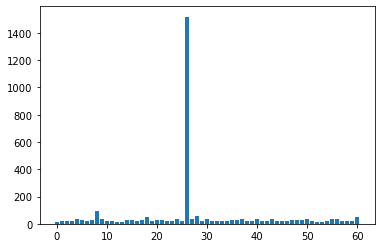

In [111]:
count_and_plot(y)

n = 26 만 우뚝 쏟아 있는데 이것은 '운동 아님' 데이터이다.

따라서 우리는 언더 샘플링을 해 숫자를 맞춰줄 것이다.

In [114]:
import imblearn
print(imblearn.__version__)

0.7.0


In [143]:
X_2 = X.numpy()

In [136]:
X_2.shape

(3125, 600, 6)

In [145]:
X_1 = X_2.reshape((3125,-1))

In [146]:
X_1.shape

(3125, 3600)

Class=0, n=12 (1.639%)
Class=1, n=12 (1.639%)
Class=2, n=12 (1.639%)
Class=3, n=12 (1.639%)
Class=4, n=12 (1.639%)
Class=5, n=12 (1.639%)
Class=6, n=12 (1.639%)
Class=7, n=12 (1.639%)
Class=8, n=12 (1.639%)
Class=9, n=12 (1.639%)
Class=10, n=12 (1.639%)
Class=11, n=12 (1.639%)
Class=12, n=12 (1.639%)
Class=13, n=12 (1.639%)
Class=14, n=12 (1.639%)
Class=15, n=12 (1.639%)
Class=16, n=12 (1.639%)
Class=17, n=12 (1.639%)
Class=18, n=12 (1.639%)
Class=19, n=12 (1.639%)
Class=20, n=12 (1.639%)
Class=21, n=12 (1.639%)
Class=22, n=12 (1.639%)
Class=23, n=12 (1.639%)
Class=24, n=12 (1.639%)
Class=25, n=12 (1.639%)
Class=26, n=12 (1.639%)
Class=27, n=12 (1.639%)
Class=28, n=12 (1.639%)
Class=29, n=12 (1.639%)
Class=30, n=12 (1.639%)
Class=31, n=12 (1.639%)
Class=32, n=12 (1.639%)
Class=33, n=12 (1.639%)
Class=34, n=12 (1.639%)
Class=35, n=12 (1.639%)
Class=36, n=12 (1.639%)
Class=37, n=12 (1.639%)
Class=38, n=12 (1.639%)
Class=39, n=12 (1.639%)
Class=40, n=12 (1.639%)
Class=41, n=12 (1.639%)
Cl

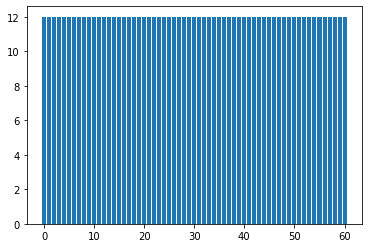

In [147]:
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_1,y)
count_and_plot(y_resampled)

In [152]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
y1 = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X_1, y1, test_size=0.2)

In [154]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

#가벼운 모델 생성
model = Sequential()
model.add(Dense(32, input_dim =3600))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                115232    
_________________________________________________________________
dense_61 (Dense)             (None, 128)               4224      
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 61)                7869      
Total params: 127,325
Trainable params: 127,325
Non-trainable params: 0
_________________________________________________________________


In [156]:
history = model.fit(x_train,y_train
          , epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 2s 29ms/step - loss: 40.5357 - accuracy: 0.1849 - val_loss: 27.3190 - val_accuracy: 0.2900
Epoch 2/30
16/16 [==============================] - 0s 13ms/step - loss: 12.6300 - accuracy: 0.4260 - val_loss: 24.5739 - val_accuracy: 0.3100
Epoch 3/30
16/16 [==============================] - 0s 11ms/step - loss: 7.5247 - accuracy: 0.4848 - val_loss: 22.7846 - val_accuracy: 0.3720
Epoch 4/30
16/16 [==============================] - 0s 10ms/step - loss: 5.2116 - accuracy: 0.5958 - val_loss: 23.6556 - val_accuracy: 0.3420
Epoch 5/30
16/16 [==============================] - 0s 11ms/step - loss: 4.3872 - accuracy: 0.6034 - val_loss: 24.6225 - val_accuracy: 0.3360
Epoch 6/30
16/16 [==============================] - 0s 10ms/step - loss: 3.6313 - accuracy: 0.6373 - val_loss: 24.0559 - val_accuracy: 0.3660
Epoch 7/30
16/16 [==============================] - 0s 10ms/step - loss: 2.6136 - accuracy: 0.6917 - val_loss: 25.3608 - val_accuracy: 0.3680
Epoc

In [157]:
y_pred = model.predict(x_test)

In [158]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test_encoding)))

테스트 세트의 정확도: 0.48


In [159]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [161]:
X_3 = test_X.numpy()

In [163]:
X_3.shape

(782, 600, 6)

In [164]:
X_3 = X_3.reshape((782,-1))

In [165]:
prediction = model.predict(X_3)

In [167]:
submission.iloc[:,1:]=prediction

In [168]:
submission.to_csv('ann_downsampling.csv', index=False)